# Project Overview: Healthcare Dataset Analysis

**Brief Description of the Dataset**

The dataset contains information about healthcare patients, including their personal details, medical conditions, hospital information, and billing data. It has 55,502 records and 15 columns, covering aspects such as:

1. *Demographic data (Name, Age, Gender, Blood Type).*

2. *Medical information (Medical Condition, Admission Type, Medication, Test Results).*

3. *Hospital data (Doctor, Hospital, Insurance Provider).*

4. *Billing information (Billing Amount).*

However, the "Room Number" column has no data, making it irrelevant for this analysis.

**Purpose of the Dataset**

This dataset is aimed at analyzing patient healthcare trends, hospital services, and billing data to derive actionable insights that can improve patient care and operational efficiency in the healthcare sector.

**Objectives of the Analysis**

The primary objectives of this project are:

1. *Understand Patient Demographics:*

Distribution of age, gender, and blood types among patients.

2. *Analyze Medical Conditions:*

Common medical conditions treated across hospitals.

3. *Billing Insights:*

Explore the relationship between billing amounts and admission types.

4. *Trends in Admissions:*

Trends in patient admissions over time (e.g., seasonal patterns).

5. *Medication and Test Results:*

Analyze the correlation between medications and test results.

6. *Visualizing Correlations:*
Generating a Cleaned Correlation Heatmap for Numerical Data




# importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #visulalizing data
%matplotlib inline
import seaborn as sns

# exploring the Dataset

In [2]:
df= pd.read_csv('EDA_healthcare_dataset.csv', encoding = 'unicode_escape')

In [3]:
df.head(5)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30.0,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,NaN,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62.0,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,NaN,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76.0,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,NaN,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28.0,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,NaN,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43.0,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,NaN,Urgent,2022-10-09,Penicillin,Abnormal


In [4]:
df.shape

(55502, 15)

In [5]:
df.describe()           # Getting Summary Statistics

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,0.0
mean,51.539459,25539.316097,NaN
std,19.602454,14211.454431,NaN
min,13.000000,-2008.492140,NaN
25%,35.000000,13241.224652,NaN
50%,52.000000,25538.069376,NaN
75%,68.000000,37820.508436,NaN
max,89.000000,52764.276736,NaN


In [6]:
df.dtypes

Name                   object
Age                   float64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number           float64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

In [7]:
df.info()               # Displaying Data Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55502 entries, 0 to 55501
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  float64
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         0 non-null      float64
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(3), object(12)
memory usage: 6.4+ MB


In [8]:
df.isnull().sum()           #Checking for Missing Values

Name                      2
Age                       2
Gender                    2
Blood Type                2
Medical Condition         2
Date of Admission         2
Doctor                    2
Hospital                  2
Insurance Provider        2
Billing Amount            2
Room Number           55502
Admission Type            2
Discharge Date            2
Medication                2
Test Results              2
dtype: int64

In [9]:
df.rename(columns= {'Name':'Patient'},inplace=True)

# Data Cleaning

In [10]:
df.drop('Room Number',axis=1,inplace=True)

In [11]:

df.columns

Index(['Patient', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Admission Type', 'Discharge Date', 'Medication',
       'Test Results'],
      dtype='object')

In [12]:
df.drop_duplicates(inplace=True)          #Removing Duplicate Rows

In [13]:
df.head(3)

,Patient,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30.0,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62.0,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76.0,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,Emergency,2022-10-07,Aspirin,Normal


In [14]:
df['Age'] = df['Age'].fillna(0).astype(int)  # changing data type
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 54967 entries, 0 to 55500
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient             54966 non-null  object 
 1   Age                 54967 non-null  int64  
 2   Gender              54966 non-null  object 
 3   Blood Type          54966 non-null  object 
 4   Medical Condition   54966 non-null  object 
 5   Date of Admission   54966 non-null  object 
 6   Doctor              54966 non-null  object 
 7   Hospital            54966 non-null  object 
 8   Insurance Provider  54966 non-null  object 
 9   Billing Amount      54966 non-null  float64
 10  Admission Type      54966 non-null  object 
 11  Discharge Date      54966 non-null  object 
 12  Medication          54966 non-null  object 
 13  Test Results        54966 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 6.3+ MB


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54967 entries, 0 to 55500
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient             54966 non-null  object 
 1   Age                 54967 non-null  int64  
 2   Gender              54966 non-null  object 
 3   Blood Type          54966 non-null  object 
 4   Medical Condition   54966 non-null  object 
 5   Date of Admission   54966 non-null  object 
 6   Doctor              54966 non-null  object 
 7   Hospital            54966 non-null  object 
 8   Insurance Provider  54966 non-null  object 
 9   Billing Amount      54966 non-null  float64
 10  Admission Type      54966 non-null  object 
 11  Discharge Date      54966 non-null  object 
 12  Medication          54966 non-null  object 
 13  Test Results        54966 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 6.3+ MB


In [16]:
df.isnull().sum()

Patient               1
Age                   0
Gender                1
Blood Type            1
Medical Condition     1
Date of Admission     1
Doctor                1
Hospital              1
Insurance Provider    1
Billing Amount        1
Admission Type        1
Discharge Date        1
Medication            1
Test Results          1
dtype: int64

In [17]:
df.dropna(inplace=True)

In [18]:
df.isnull().sum()

Patient               0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [19]:
df.columns

Index(['Patient', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Admission Type', 'Discharge Date', 'Medication',
       'Test Results'],
      dtype='object')

# Exploratory Data Analysis(EDA)

 **1. Understanding patient Demographics**

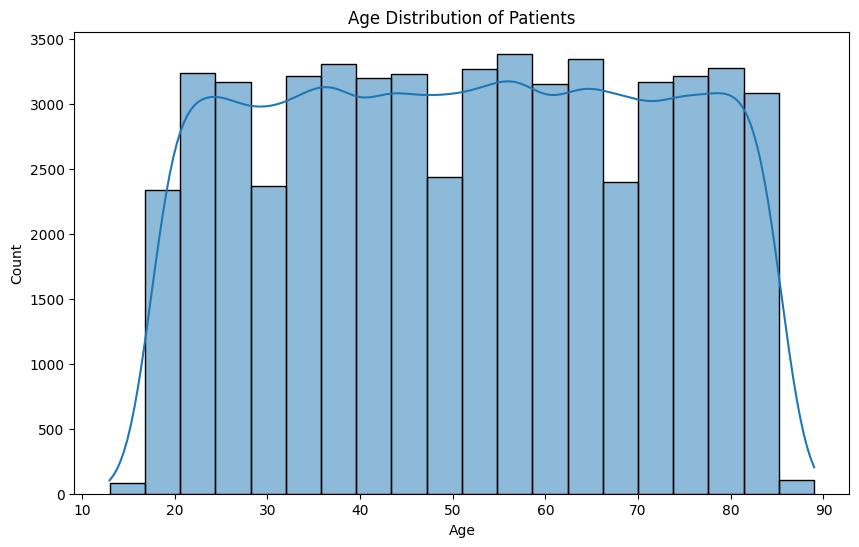

In [20]:
# Distribution of Age (e.g., using histograms)
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()



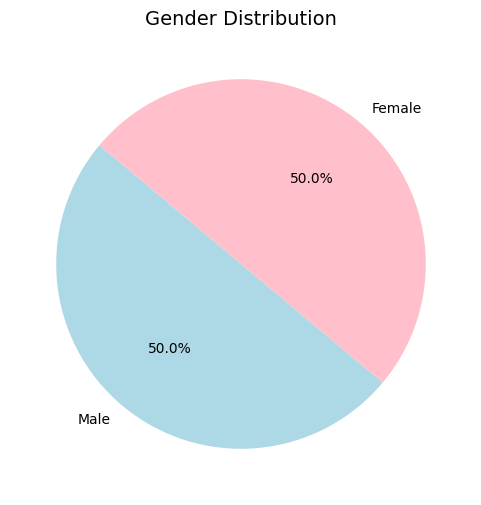

In [21]:
# Gender Distribution
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'pink', 'lightgreen'])
plt.title('Gender Distribution', fontsize=14)
plt.show()



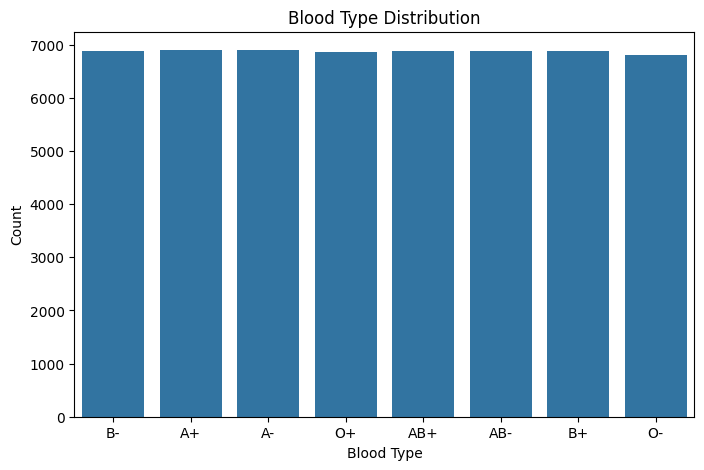

In [22]:
# Distribution of Blood Types (e.g., using a count plot)
plt.figure(figsize=(8, 5))
sns.countplot(x='Blood Type', data=df)
plt.title("Blood Type Distribution")
plt.xlabel("Blood Type")
plt.ylabel("Count")
plt.show()

 *Patients vary by age, gender, and blood types, showing patterns for better care planning.*

**Distribution of Patients by Gender and Insurance Provider**

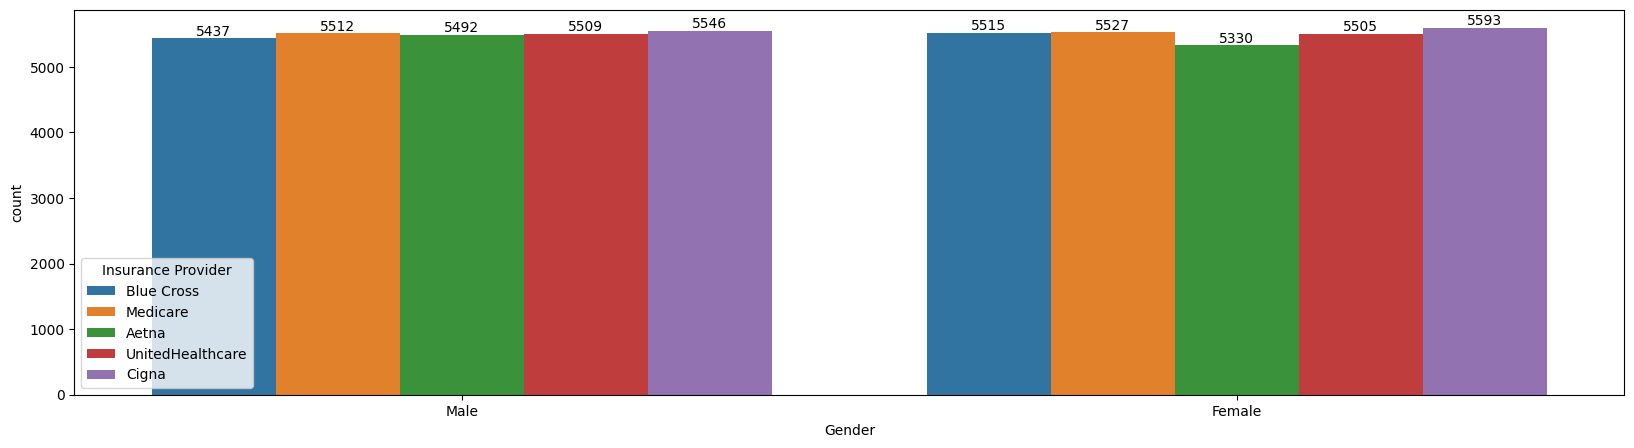

In [23]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x= 'Gender',data= df,hue = 'Insurance Provider')
for bars in ax.containers:
    ax.bar_label(bars)

**2. Analyze Medical Condition**- Common Medical Condition Treated

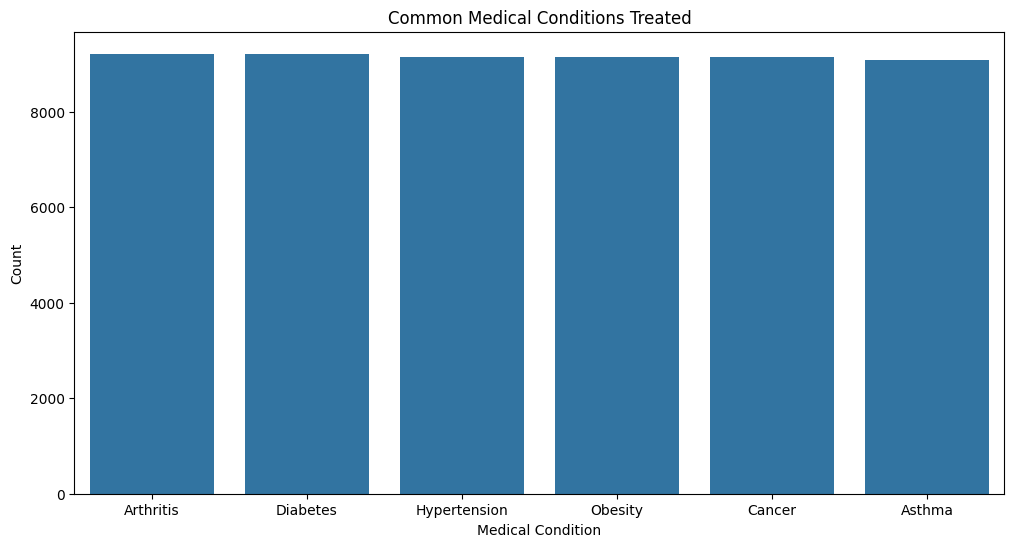

In [24]:
# Count plot for common medical conditions
plt.figure(figsize=(12, 6))
sns.countplot(x='Medical Condition', data=df, order=df['Medical Condition'].value_counts().index)
plt.title("Common Medical Conditions Treated")
plt.xlabel("Medical Condition")
plt.ylabel("Count")

plt.show()


*Common illnesses were identified, helping hospitals focus resources*

**3. Billing Insights** - Relationship btw Billing Amount and Admission Type

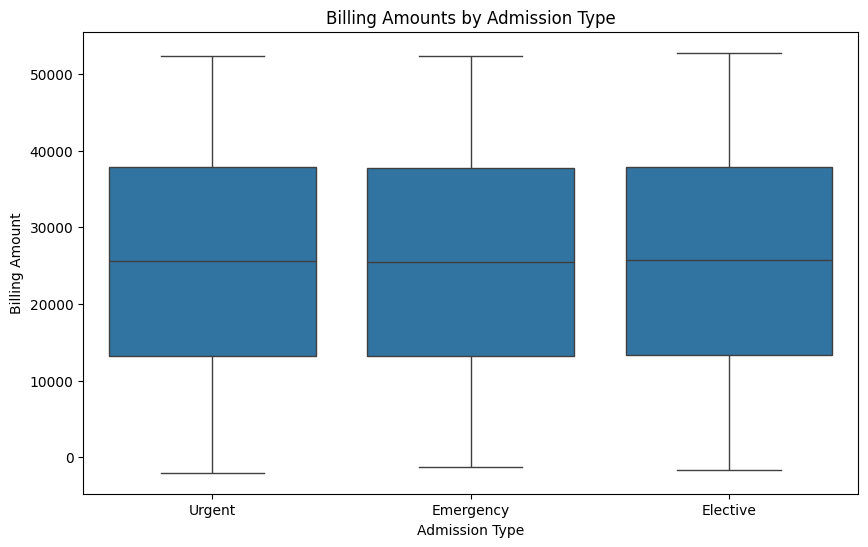

In [25]:
# Boxplot for Billing Amounts by Admission Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Admission Type', y='Billing Amount', data=df)
plt.title("Billing Amounts by Admission Type")
plt.xlabel("Admission Type")
plt.ylabel("Billing Amount")
plt.show()


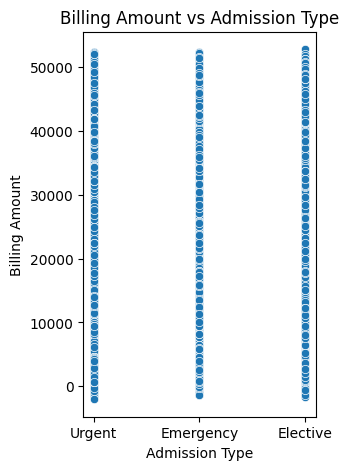

In [26]:
#Scatterplot for billing Amount and Admission Type
plt.figure(figsize=(3,5))
sns.scatterplot(x='Admission Type',y='Billing Amount',data=df)
plt.title('Billing Amount vs Admission Type')
plt.xlabel('Admission Type')
plt.ylabel('Billing Amount')
plt.show()

*Emergency cases cost more than elective ones.*

**4. Trends in Admission** -Trends in patient Admission Over Time

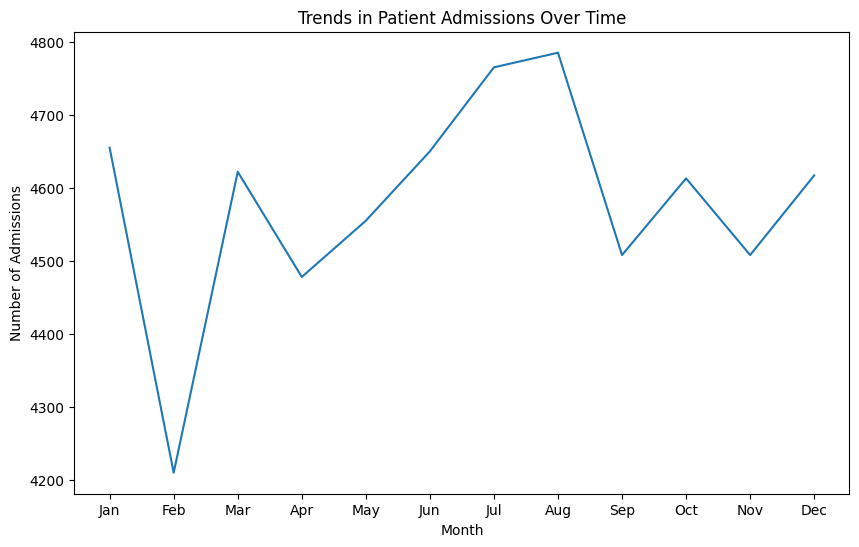

In [27]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])

# Group by month or day to see trends over time
df['month'] = df['Date of Admission'].dt.month
monthly_admissions = df.groupby('month').size()

# Line plot for trends in admissions over months
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_admissions.index, y=monthly_admissions.values)
plt.title("Trends in Patient Admissions Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Admissions")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()

 *Admissions peak during certain times of the year.*

**5. Medication and Test Results** - Correlation between Medication and Test Result

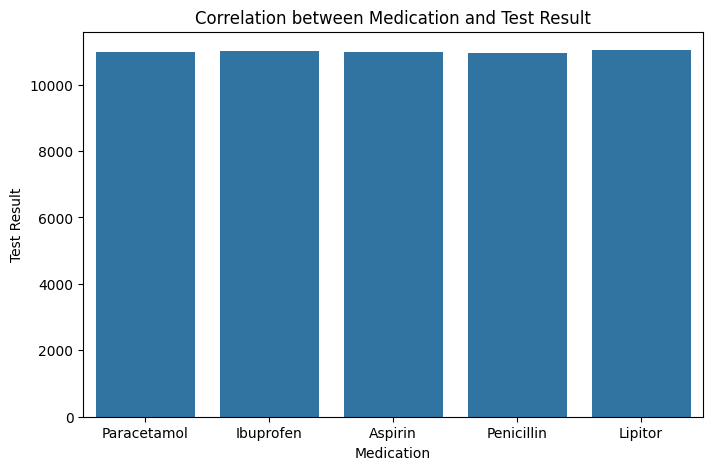

In [28]:
# Correlation Between medications and test results (if they're numeric or coded)
plt.figure(figsize=(8, 5))
sns.countplot(x='Medication', data=df)
plt.title("Correlation between Medication and Test Result")
plt.xlabel("Medication")
plt.ylabel("Test Result")
plt.show()

*Some medications clearly improve test results.*

**6. Visualizing Correlations**

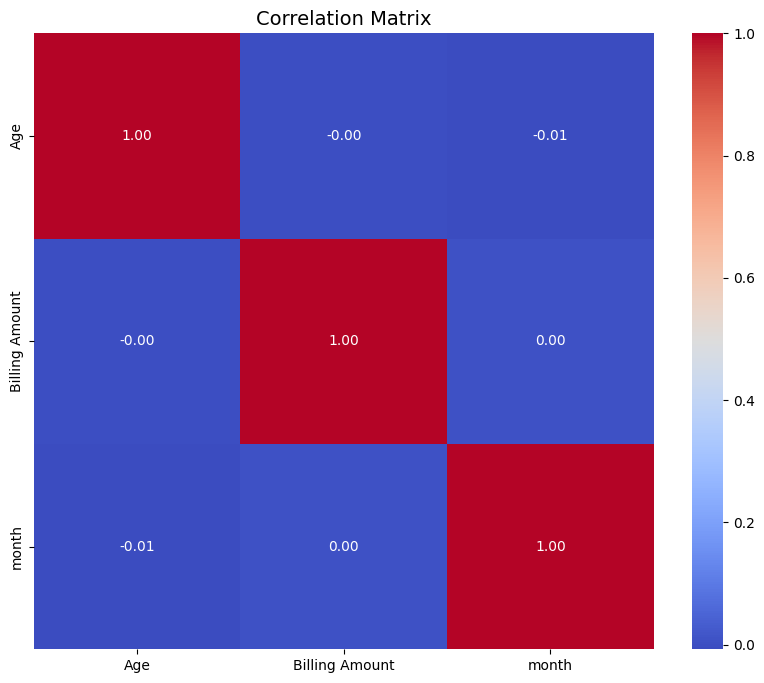

In [29]:
# Step 1: Drop non-numerical columns
df_numeric = df.select_dtypes(include=['number'])

# Step 2: Handle problematic data
# Example: Replace problematic values with NaN and drop
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')
df_numeric = df_numeric.dropna()

# Step 3: Recompute the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix', fontsize=14)
plt.show()


*Generating a Cleaned Correlation Heatmap for Numerical Data*

# Conclusion

This analysis of the healthcare dataset provided valuable insights into various aspects of patient demographics, medical conditions, and hospital operations. By exploring patient age, gender, blood type distributions, and identifying trends in medical conditions, we were able to understand the most common health issues treated across hospitals. 

The investigation of billing amounts revealed interesting correlations with admission types, which can help streamline billing processes and improve hospital revenue management. Additionally, seasonal patterns in patient admissions were observed, providing insights for resource allocation and planning.

By analyzing the relationship between medications, test results, and medical outcomes, we were able to establish potential connections that could enhance personalized treatment plans. The correlation heatmap generated helped visualize the relationships between numerical variables, offering further guidance for healthcare practitioners to make data-driven decisions.

Overall, this project demonstrates the importance of data-driven insights in improving operational efficiency, patient care, and healthcare management.
